## How to use global Lagrangian eddy dataset (GLED v1.0)
We encourage users to use PYTHON for reading and visualizing this dataset

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# *eddyinfo*
The general feature of eddies

In [3]:
df30 = pd.read_json('/data/home/liutongya/RCLV/data/GLED/eddyinfo/eddy_info_30d.json')
df90 = pd.read_json('/data/home/liutongya/RCLV/data/GLED/eddyinfo/eddy_info_90d.json')
df180 = pd.read_json('/data/home/liutongya/RCLV/data/GLED/eddyinfo/eddy_info_180d.json')

In [4]:
df30.head()

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd
0,1993-01-01_030day_000001,1993-01-01,30,55.188311,-1,"[286.859375, 286.3567504883, 286.1399230957, 2...","[33.953125, 33.260559082, 33.0489311218, 32.86...",-82.246013,-0.031731,-121.479049,-0.046867,0.000022,0.000021
1,1993-01-01_030day_000002,1993-01-01,30,68.096917,-1,"[59.921875, 59.7961425781, 60.1015586853, 60.7...","[-41.078125, -41.125919342, -41.2514038086, -4...",65.087282,0.025111,-59.110905,-0.022805,-0.000025,0.000024
2,1993-01-01_030day_000003,1993-01-01,30,84.808323,-1,"[15.328125, 14.7080430984, 15.1562309265, 15.4...","[-36.296875, -35.9927330017, -36.0076370239, -...",10.585501,0.004084,-43.390131,-0.016740,-0.000023,0.000022
3,1993-01-01_030day_000004,1993-01-01,30,54.042031,-1,"[301.359375, 301.3267822266, 300.9379577637, 3...","[38.515625, 38.4245986938, 38.4283027649, 38.3...",-61.252594,-0.023631,-17.076861,-0.006588,0.000025,0.000021
4,1993-01-01_030day_000005,1993-01-01,30,39.849386,1,"[150.078125, 150.1067047119, 150.7658996582, 1...","[-56.921875, -57.1972579956, -57.1831169128, -...",54.100711,0.020872,-35.992520,-0.013886,0.000024,0.000024


In [5]:
# 30-day eddy number
df30.shape

(1095356, 13)

In [6]:
# 90-day eddy number
df90.shape

(116656, 13)

In [7]:
# 180-day eddy number
df180.shape

(13643, 13)

In [8]:
# search the 30-day eddy in July 2016

dftmp = df30[df30['date_start'] == '2016-01-01']
dftmp.head()

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd
947686,2016-01-01_030day_000001,2016-01-01,30,25.648768,-1,"[288.984375, 288.7565002441, 288.5667114258, 2...","[35.140625, 35.1790657043, 35.193977356, 34.96...",-51.627686,-0.019918,-19.575251,-0.007552,0.000016,0.000047
947687,2016-01-01_030day_000002,2016-01-01,30,45.049008,-1,"[317.390625, 318.0808105469, 318.0866699219, 3...","[46.703125, 46.9496650696, 47.1558380127, 47.1...",16.853967,0.006502,53.676799,0.020709,0.000021,0.000028
947688,2016-01-01_030day_000004,2016-01-01,30,67.049681,1,"[16.859375, 16.8722763062, 16.9273014069, 17.2...","[-42.296875, -42.7256469727, -42.9316291809, -...",27.881610,0.010757,-96.384433,-0.037185,0.000028,0.000026
947689,2016-01-01_030day_000005,2016-01-01,30,47.190446,-1,"[227.203125, 227.312789917, 227.4043121338, 22...","[-58.296875, -58.1903457642, -58.304725647, -5...",18.963148,0.007316,-26.698422,-0.010300,-0.000019,0.000022
947690,2016-01-01_030day_000006,2016-01-01,30,55.777931,-1,"[34.734375, 34.9893722534, 35.2397003174, 35.4...","[-48.421875, -48.3030853271, -48.2508277893, -...",54.313809,0.020954,26.770107,0.010328,-0.000026,0.000027


In [9]:
# the total number is 
dftmp.shape

(3498, 13)

Text(0.5, 1.0, 'Eddy generation site (dots) and radius (colors)')

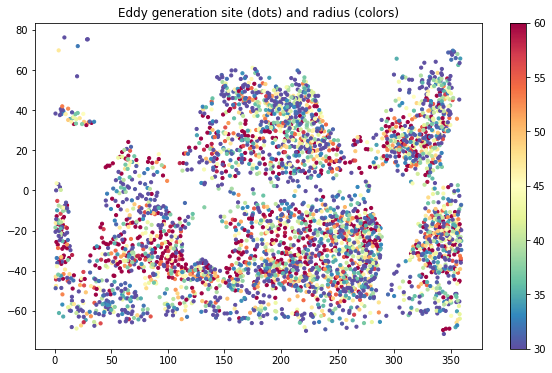

In [10]:
fig = plt.figure(figsize=(10, 6))
# the initial position of the eddy center
lon0 = [tmp[0] for tmp in dftmp['center_lon']]
lat0 = [tmp[0] for tmp in dftmp['center_lat']]

plt.scatter(lon0, lat0, c=dftmp.radius, s=10, vmin=30, vmax=60, cmap='Spectral_r')
plt.colorbar()
plt.title('Eddy generation site (dots) and radius (colors)')

# *eddytraj*
The particle positions

In [30]:
# randomly select 3 eddies
import random
rand1 = random.sample(np.arange(df30.shape[0]).tolist(), 1)
rand2 = random.sample(np.arange(df90.shape[0]).tolist(), 1)
rand3 = random.sample(np.arange(df180.shape[0]).tolist(), 1)

In [31]:
# 30-day eddy
df30.iloc[rand1]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd
392035,2002-10-01_030day_001832,2002-10-01,30,46.5365,1,"[59.921875, 59.4859580994, 59.2025375366, 58.5...","[-34.484375, -34.2611122131, -34.4543113708, -...",-129.19922,-0.049845,-16.759578,-0.006466,0.000006,0.000005


In [32]:
# match the nc file based on the eddy id
fn = '/data/home/liutongya/RCLV/data/GLED/eddytraj/30day/' + df30.iloc[rand1].id.item() + '.nc'
ds1 = xr.open_dataset(fn)
ds1

<xarray.Dataset>
Dimensions:  (time: 4, y0: 39, x0: 27)
Coordinates:
  * y0       (y0) float32 -35.14 -35.11 -35.08 -35.05 ... -34.02 -33.98 -33.95
  * time     (time) int64 0 10 20 30
  * x0       (x0) float32 59.42 59.45 59.48 59.52 ... 60.14 60.17 60.2 60.23
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2002-10-01_030day_001832
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Initial (blue) and final (red) position of the 30-day eddy')

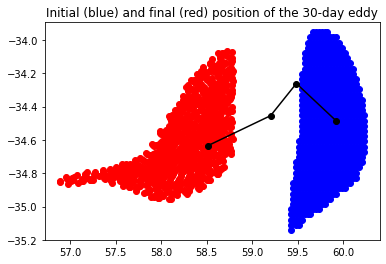

In [33]:
plt.scatter(ds1.x[0], ds1.y[0], color='b')

plt.scatter(ds1.x[-1], ds1.y[-1], color='r')

clon = df30.iloc[rand1].center_lon.item()
clat = df30.iloc[rand1].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')

plt.title('Initial (blue) and final (red) position of the 30-day eddy')

In [24]:
# 90-day eddy
df90.iloc[rand2]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd
66733,2009-04-01_090day_000046,2009-04-01,90,57.782291,-1,"[65.578125, 65.5401000977, 65.2409439087, 64.7...","[-39.890625, -39.9920883179, -39.9117469788, -...",-210.094219,-0.027018,50.669398,0.006516,-0.000007,0.000009


In [25]:
fn = '/data/home/liutongya/RCLV/data/GLED/eddytraj/90day/' + df90.iloc[rand2].id.item() + '.nc'
ds2 = xr.open_dataset(fn)
ds2

<xarray.Dataset>
Dimensions:  (time: 10, y0: 35, x0: 44)
Coordinates:
  * x0       (x0) float32 64.92 64.95 64.98 65.02 ... 66.17 66.2 66.23 66.27
  * y0       (y0) float32 -40.48 -40.45 -40.42 -40.39 ... -39.48 -39.45 -39.42
  * time     (time) int64 0 10 20 30 40 50 60 70 80 90
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2009-04-01_090day_000046
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Initial (blue) and final (red) position of the 90-day eddy')

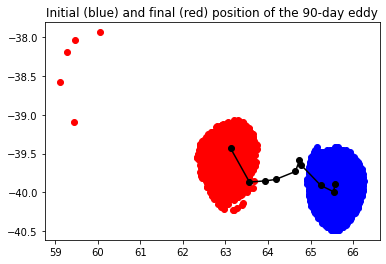

In [26]:
plt.scatter(ds2.x[0], ds2.y[0], color='b')

plt.scatter(ds2.x[-1], ds2.y[-1], color='r')

clon = df90.iloc[rand2].center_lon.item()
clat = df90.iloc[rand2].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')

plt.title('Initial (blue) and final (red) position of the 90-day eddy')

In [27]:
# 180-day eddy
df180.iloc[rand3]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd
6356,2007-10-01_180day_000012,2007-10-01,180,50.088468,-1,"[92.984375, 92.7098693848, 92.3812561035, 92.0...","[-32.671875, -32.8260269165, -32.9424591064, -...",-393.447049,-0.025299,-107.494424,-0.006912,-0.000007,0.000009


In [28]:
fn = '/data/home/liutongya/RCLV/data/GLED/eddytraj/180day/' + df180.iloc[rand3].id.item() + '.nc'
ds3 = xr.open_dataset(fn)
ds3

<xarray.Dataset>
Dimensions:  (time: 19, y0: 34, x0: 30)
Coordinates:
  * x0       (x0) float32 92.58 92.61 92.64 92.67 ... 93.39 93.42 93.45 93.48
  * time     (time) int64 0 10 20 30 40 50 60 70 ... 120 130 140 150 160 170 180
  * y0       (y0) float32 -33.11 -33.08 -33.05 -33.02 ... -32.14 -32.11 -32.08
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2007-10-01_180day_000012
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Particle positions every 10 days of the 180-day eddy')

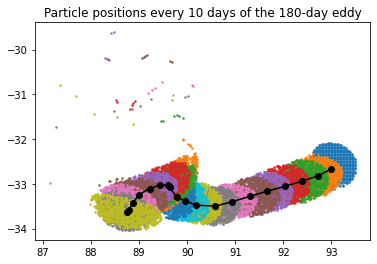

In [29]:
for i in np.arange(19):
    
    plt.scatter(ds3.x[i], ds3.y[i], s=2)

clon = df180.iloc[rand3].center_lon.item()
clat = df180.iloc[rand3].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')
    
plt.title('Particle positions every 10 days of the 180-day eddy')